In [186]:
from datetime import datetime
from dateutil.parser import parse
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from fbprophet import Prophet
from fbprophet.diagnostics import cross_validation,performance_metrics
from fbprophet.plot import plot_cross_validation_metric
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error



In [43]:
train = pd.read_table("all/train.csv", sep=",")

/Users/charles.he/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [61]:
train

,id,store_nbr,item_nbr,unit_sales,onpromotion
date,,,,,
2013-01-01,0,25,103665,7.0,NaN
2013-01-01,1,25,105574,1.0,NaN
2013-01-01,2,25,105575,2.0,NaN
2013-01-01,3,25,108079,1.0,NaN
2013-01-01,4,25,108701,1.0,NaN
2013-01-01,5,25,108786,3.0,NaN
2013-01-01,6,25,108797,1.0,NaN
2013-01-01,7,25,108952,1.0,NaN
2013-01-01,8,25,111397,13.0,NaN


In [41]:
# train.head()

# test = train.pivot(index='date', columns='state', values='unit_sales').sum()

In [172]:
test = pd.read_table("all/test.csv", sep=",")

In [5]:
stores = pd.read_table("all/stores.csv", sep=",")

In [87]:
stores

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4
5,6,Quito,Pichincha,D,13
6,7,Quito,Pichincha,D,8
7,8,Quito,Pichincha,D,8
8,9,Quito,Pichincha,B,6
9,10,Quito,Pichincha,C,15


In [6]:
items = pd.read_table("all/items.csv", sep=",")

In [44]:
train['date'] = pd.to_datetime(train['date'])
train.set_index('date', inplace=True)

df_2017 = train[train.index>'2017-1-1']
df_2017 = pd.merge(df_2017, items, on='item_nbr', right_index=True)
df_2017 = pd.merge(df_2017, stores, on='store_nbr', right_index=True)
df_2017.to_csv("2017.csv", sep=",")

In [92]:
train.head()
train.groupby(train.index)

In [99]:
df_2016 = train[(train.index>='2016-1-1') &(train.index<'2017-1-1')]
df_2016 = pd.merge(df_2016, items, on='item_nbr', right_index=True)
df_2016 = pd.merge(df_2016, stores, on='store_nbr', right_index=True)
df_grouped_state_2016 = df_2016.groupby('state').agg({'unit_sales':sum}).sort_values('unit_sales', ascending=True).reset_index()
df_grouped_state_2016.sort_values(by='unit_sales', ascending=False)
df_grouped_state_2016.to_csv("all/new/grouped_state_2016.csv", sep=",")

In [100]:
df_2015 = train[(train.index>='2015-1-1') &(train.index<'2016-1-1')]
df_2015 = pd.merge(df_2015, items, on='item_nbr', right_index=True)
df_2015 = pd.merge(df_2015, stores, on='store_nbr', right_index=True)
df_grouped_state_2015 = df_2015.groupby('state').agg({'unit_sales':sum}).sort_values('unit_sales', ascending=True).reset_index()
df_grouped_state_2015.sort_values(by='unit_sales', ascending=False)
df_grouped_state_2015.to_csv("all/new/grouped_state_2015.csv", sep=",")

In [101]:
df_2014 = train[(train.index>='2014-1-1') &(train.index<'2015-1-1')]
df_2014 = pd.merge(df_2014, items, on='item_nbr', right_index=True)
df_2014 = pd.merge(df_2014, stores, on='store_nbr', right_index=True)
df_grouped_state_2014 = df_2014.groupby('state').agg({'unit_sales':sum}).sort_values('unit_sales', ascending=True).reset_index()
df_grouped_state_2014.sort_values(by='unit_sales', ascending=False)
df_grouped_state_2014.to_csv("all/new/grouped_state_2014.csv", sep=",")

In [102]:
df_2013 = train[(train.index>='2013-1-1') &(train.index<'2014-1-1')]
df_2013 = pd.merge(df_2013, items, on='item_nbr', right_index=True)
df_2013 = pd.merge(df_2013, stores, on='store_nbr', right_index=True)
df_grouped_state_2013 = df_2013.groupby('state').agg({'unit_sales':sum}).sort_values('unit_sales', ascending=True).reset_index()
df_grouped_state_2013.sort_values(by='unit_sales', ascending=False)
df_grouped_state_2013.to_csv("all/new/grouped_state_2013.csv", sep=",")

In [68]:
df_2017 = train[(train.index>='2017-1-1')]
df_2017 = pd.merge(df_2017, items, on='item_nbr', right_index=True)
df_2017 = pd.merge(df_2017, stores, on='store_nbr', right_index=True)
df_grouped_city_2017 = df_2017.groupby('city').agg({'unit_sales':sum}).sort_values('unit_sales', ascending=True).reset_index()
df_grouped_city_2017.sort_values(by='unit_sales', ascending=False)
df_grouped_city_2017.to_csv("all/new/grouped_city_2017.csv", sep=",")

In [63]:
df_2016 = train[(train.index>='2016-1-1') &(train.index<'2017-1-1')]
df_2016 = pd.merge(df_2016, items, on='item_nbr', right_index=True)
df_2016 = pd.merge(df_2016, stores, on='store_nbr', right_index=True)
df_grouped_state_2016 = df_2016.groupby('city').agg({'unit_sales':sum}).sort_values('unit_sales', ascending=True).reset_index()
df_grouped_state_2016.sort_values(by='unit_sales', ascending=False)
df_grouped_state_2016.to_csv("all/new/grouped_state_2016.csv", sep=",")

In [105]:
stores.head()

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [64]:
df_2015 = train[(train.index>='2015-1-1') &(train.index<'2016-1-1')]
df_2015 = pd.merge(df_2015, items, on='item_nbr', right_index=True)
df_2015 = pd.merge(df_2015, stores, on='store_nbr', right_index=True)
df_grouped_state_2015 = df_2015.groupby('city').agg({'unit_sales':sum}).sort_values('unit_sales', ascending=True).reset_index()
df_grouped_state_2015.sort_values(by='unit_sales', ascending=False)
df_grouped_state_2015.to_csv("all/new/grouped_state_2015.csv", sep=",")

In [65]:
df_2014 = train[(train.index>='2014-1-1') &(train.index<'2015-1-1')]
df_2014 = pd.merge(df_2014, items, on='item_nbr', right_index=True)
df_2014 = pd.merge(df_2014, stores, on='store_nbr', right_index=True)
df_grouped_state_2014 = df_2014.groupby('city').agg({'unit_sales':sum}).sort_values('unit_sales', ascending=True).reset_index()
df_grouped_state_2014.sort_values(by='unit_sales', ascending=False)
df_grouped_state_2014.to_csv("all/new/grouped_state_2014.csv", sep=",")

In [66]:
df_2013 = train[(train.index>='2013-1-1') &(train.index<'2014-1-1')]
df_2013 = pd.merge(df_2013, items, on='item_nbr', right_index=True)
df_2013 = pd.merge(df_2013, stores, on='store_nbr', right_index=True)
df_grouped_state_2013 = df_2013.groupby('city').agg({'unit_sales':sum}).sort_values('unit_sales', ascending=True).reset_index()
df_grouped_state_2013.sort_values(by='unit_sales', ascending=False)
df_grouped_state_2013.to_csv("all/new/grouped_state_2013.csv", sep=",")

In [69]:
df_2017['weekday'] = [item.weekday() for item in df_2017.index]
df_stores_weekday = df_2017.groupby(['store_nbr', 'weekday']).sum().reset_index()

In [95]:
df_2016['weekday'] = [item.weekday() for item in df_2016.index]
df_stores_weekday = df_2016.groupby(['store_nbr', 'weekday']).sum().reset_index()
df_stores_weekday.to_csv("all/new/stores_weekday_2016.csv", sep=",")

In [96]:
df_2015['weekday'] = [item.weekday() for item in df_2015.index]
df_stores_weekday = df_2015.groupby(['store_nbr', 'weekday']).sum().reset_index()
df_stores_weekday.to_csv("all/new/stores_weekday_2015.csv", sep=",")

In [97]:
df_2014['weekday'] = [item.weekday() for item in df_2014.index]
df_stores_weekday = df_2014.groupby(['store_nbr', 'weekday']).sum().reset_index()
df_stores_weekday.to_csv("all/new/stores_weekday_2014.csv", sep=",")

In [98]:
df_2013['weekday'] = [item.weekday() for item in df_2013.index]
df_stores_weekday = df_2013.groupby(['store_nbr', 'weekday']).sum().reset_index()
df_stores_weekday.to_csv("all/new/stores_weekday_2013.csv", sep=",")

In [86]:
# df_stores_weekday
testing = df_stores_weekday.pivot(index='weekday', columns='store_nbr', values='unit_sales')
list(testing.values)

[array([ 359233.561,  484464.567, 1189705.586,  425731.341,  334039.005,
         600892.052,  741665.641,  691021.301,  638128.942,  218341.258,
         668130.174,  278990.851,  244432.688,  280285.286,  296251.505,
         223305.344,  520352.973,  363890.875,  307478.231,  496753.904,
         441959.024,  231543.037,  271355.176,  551744.884,  261784.234,
         153094.722,  512330.791,  472896.541,  397513.721,  184260.588,
         419942.445,  150916.458,  317452.191,  388061.055,  200999.939,
         389335.434,  458266.401,  385648.137,  566272.589,  531357.953,
         412722.402,  422663.805,  503743.504, 1343080.313, 1322063.112,
         985022.82 , 1246371.096,  807455.844, 1217894.679,  692254.611,
         724101.583,  359432.714,  356973.726,  316607.426]),
 array([ 372999.937,  451230.346, 1065767.577,  388124.394,  304846.051,
         526017.773,  679073.06 ,  619379.13 ,  620503.02 ,  213745.398,
         662596.899,  250562.897,  224614.989,  271163.29 ,  2

In [45]:
df_grouped_state = df_2017.groupby([pd.Grouper('D'), 'state']).agg({'unit_sales':sum}).reset_index()

/Users/charles.he/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: pd.TimeGrouper is deprecated and will be removed; Please use pd.Grouper(freq=...)
  """Entry point for launching an IPython kernel.


In [111]:
df_grouped_store_2017 = df_2017.groupby(['store_nbr','state']).agg({'unit_sales':sum})
df_grouped_store_2017.to_csv("all/new/df_grouped_store_2017.csv", sep=",")

df_grouped_store_2016 = df_2016.groupby(['store_nbr','state']).agg({'unit_sales':sum})
df_grouped_store_2016.to_csv("all/new/df_grouped_store_2016.csv", sep=",")

df_grouped_store_2015 = df_2015.groupby(['store_nbr','state']).agg({'unit_sales':sum})
df_grouped_store_2015.to_csv("all/new/df_grouped_store_2015.csv", sep=",")

df_grouped_store_2014 = df_2014.groupby(['store_nbr','state']).agg({'unit_sales':sum})
df_grouped_store_2014.to_csv("new/df_grouped_store_2014.csv", sep=",")

df_grouped_store_2013 = df_2013.groupby(['store_nbr','state']).agg({'unit_sales':sum})
df_grouped_store_2013.to_csv("all/new/df_grouped_store_2013.csv", sep=",")


In [123]:
df_grouped_store_2017.reset_index().state.unique()

array(['Pichincha', 'Santo Domingo de los Tsachilas', 'Cotopaxi',
       'Chimborazo', 'Imbabura', 'Bolivar', 'Pastaza', 'Tungurahua',
       'Guayas', 'Santa Elena', 'Los Rios', 'Azuay', 'Loja', 'El Oro',
       'Esmeraldas', 'Manabi'], dtype=object)

In [126]:
stores.store_nbr.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54])

In [140]:
stores
store_info = stores[stores['store_nbr'] == 1]
store_info

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13


In [146]:
# grouped_sales = train.groupby(['store_nbr','date']).agg({'unit_sales':sum})
# grouped_sales.to_csv("all/new/df_grouped_sales.csv", sep=",")
grouped_sales
train.head()

,id,store_nbr,item_nbr,unit_sales,onpromotion
date,,,,,
2013-01-01,0,25,103665,7.0,NaN
2013-01-01,1,25,105574,1.0,NaN
2013-01-01,2,25,105575,2.0,NaN
2013-01-01,3,25,108079,1.0,NaN
2013-01-01,4,25,108701,1.0,NaN


In [ ]:
df_2017.to_csv("all/new/2017.csv", sep=",")
df_2016.to_csv("all/new/2016.csv", sep=",")
df_2015.to_csv("all/new/2015.csv", sep=",")
df_2014.to_csv("all/new/2014.csv", sep=",")
df_2013.to_csv("all/new/2013.csv", sep=",")

In [59]:
# df_grouped_state
df_grouped_state.groupby('state').agg({'unit_sales':'sum'}).reset_index()
df_grouped_state.sort_values(by='unit_sales', ascending=False)
# df_grouped_state.pivot(index='date', columns='state', values='unit_sales').sum()
# df_grouped_state.to_csv("all/new/grouped_state_2017.csv", sep=",")


,date,state,unit_sales
1436,2017-04-01,Pichincha,846761.260
12,2017-01-02,Pichincha,821605.020
2460,2017-06-04,Pichincha,769796.887
1916,2017-05-01,Pichincha,724922.543
1004,2017-03-05,Pichincha,719913.718
2908,2017-07-02,Pichincha,705943.005
108,2017-01-08,Pichincha,699178.089
1228,2017-03-19,Pichincha,698361.909
1116,2017-03-12,Pichincha,688801.374
220,2017-01-15,Pichincha,687957.428


In [32]:
transactions = pd.read_table("all/transactions.csv", sep=",")

In [8]:
oil = pd.read_table("all/oil.csv", sep=",")

In [9]:
holidays_events = pd.read_table("all/holidays_events.csv", sep=",")

In [33]:
transactions.head()

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


In [26]:
transactions = transactions.groupby('date').agg({'transactions':'sum'})
transactions = transactions.reset_index()
transactions.columns = ['ds','y']
transactions.head()

,ds,y
0,2013-01-01,770
1,2013-01-02,93215
2,2013-01-03,78504
3,2013-01-04,78494
4,2013-01-05,93573


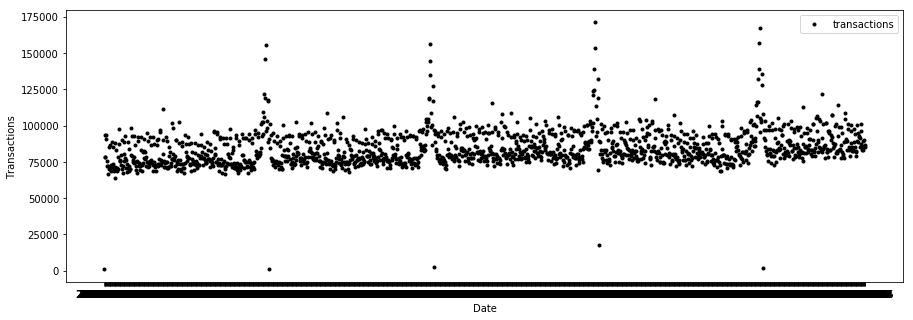

In [30]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(transactions['ds'], transactions['y'], c='black', marker='o', ms=3, linestyle='None', label='transactions')
# ax.plot(new_forecast['ds'], new_forecast['yhat'], c='b', marker='o', ms=3, linestyle='None', label='Forecast', alpha=0.5)
ax.legend()
ax.set_xlabel('Date')
ax.set_ylabel('Transactions');

In [150]:
train_data = train.groupby('date').agg({'unit_sales':sum}).reset_index()
train_data.columns = ['ds','y']
train_data.head()

,ds,y
0,2013-01-01,2511.619
1,2013-01-02,496092.418
2,2013-01-03,361429.231
3,2013-01-04,354459.677
4,2013-01-05,477350.121


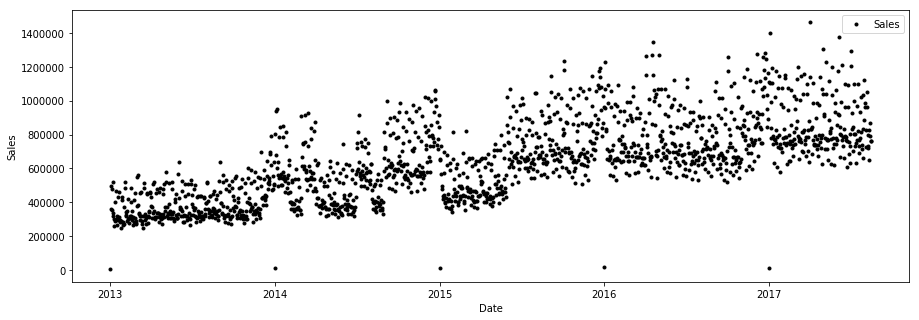

In [151]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(train_data['ds'], train_data['y'], c='black', marker='o', ms=3, linestyle='None', label='Sales')
# ax.plot(new_forecast['ds'], new_forecast['yhat'], c='b', marker='o', ms=3, linestyle='None', label='Forecast', alpha=0.5)
ax.legend()
ax.set_xlabel('Date')
ax.set_ylabel('Sales');

In [155]:
holidays_events['date'] = pd.to_datetime(holidays_events['date'],format='%Y-%m-%d')
holidays_events.date

0     2012-03-02
1     2012-04-01
2     2012-04-12
3     2012-04-14
4     2012-04-21
5     2012-05-12
6     2012-06-23
7     2012-06-25
8     2012-06-25
9     2012-06-25
10    2012-07-03
11    2012-07-03
12    2012-07-23
13    2012-08-05
14    2012-08-10
15    2012-08-15
16    2012-08-24
17    2012-09-28
18    2012-10-07
19    2012-10-09
20    2012-10-12
21    2012-11-02
22    2012-11-03
23    2012-11-06
24    2012-11-07
25    2012-11-10
26    2012-11-11
27    2012-11-12
28    2012-12-05
29    2012-12-06
         ...    
320   2017-07-23
321   2017-07-24
322   2017-07-25
323   2017-08-05
324   2017-08-10
325   2017-08-11
326   2017-08-15
327   2017-08-24
328   2017-09-28
329   2017-09-29
330   2017-10-07
331   2017-10-09
332   2017-11-02
333   2017-11-03
334   2017-11-06
335   2017-11-07
336   2017-11-10
337   2017-11-11
338   2017-11-12
339   2017-12-05
340   2017-12-06
341   2017-12-08
342   2017-12-08
343   2017-12-21
344   2017-12-22
345   2017-12-22
346   2017-12-23
347   2017-12-

In [163]:
holidays = holidays_events[['description','date']]
holidays.columns =  ['holiday','ds']
holidays.head()

,holiday,ds
0,Fundacion de Manta,2012-03-02
1,Provincializacion de Cotopaxi,2012-04-01
2,Fundacion de Cuenca,2012-04-12
3,Cantonizacion de Libertad,2012-04-14
4,Cantonizacion de Riobamba,2012-04-21


In [164]:
m = Prophet(
    holidays=holidays
)
m.fit(train_data)

/Users/charles.he/anaconda3/lib/python3.6/site-packages/fbprophet/forecaster.py:134: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  holidays['ds'] = pd.to_datetime(holidays['ds'])
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [174]:
# Forecast 
future = m.make_future_dataframe(periods=15)
# future = future[future['ds'] > '2018-01-01']
future.tail()
forecast = m.predict(future)

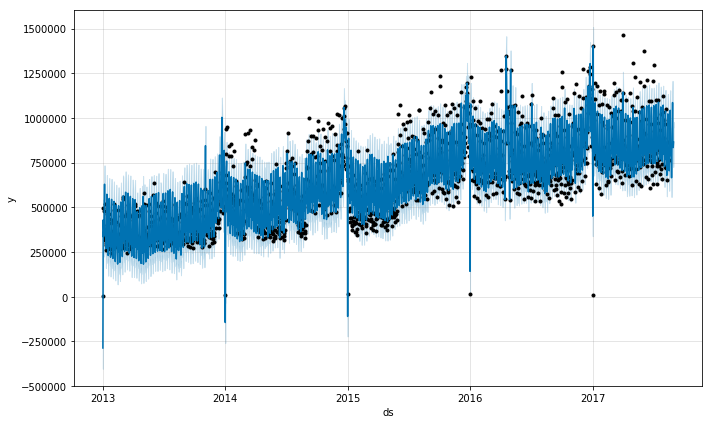

In [175]:
# How the prediction looks like for historical and future data 
fig1 = m.plot(forecast)

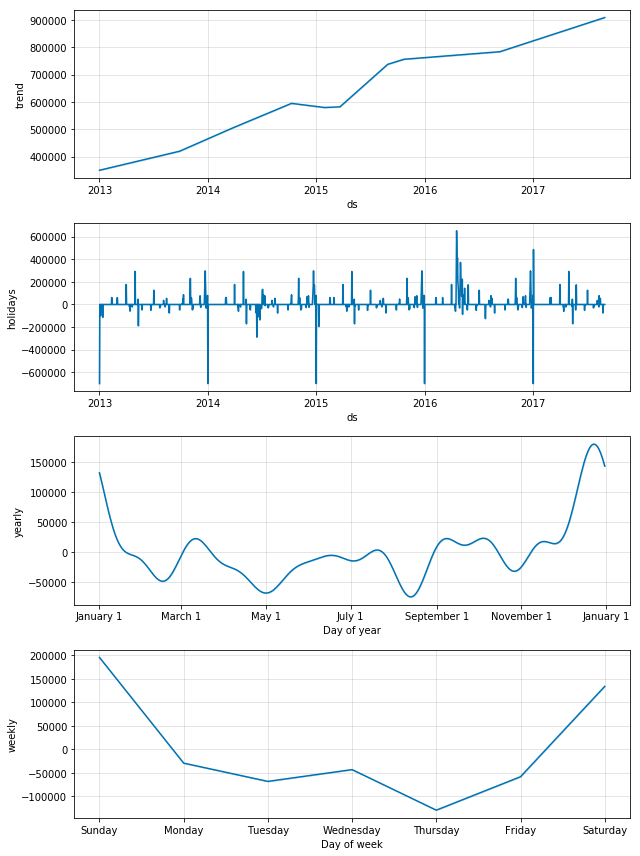

In [176]:
fig2 = m.plot_components(forecast)

In [177]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Batalla de Pichincha,Batalla de Pichincha_lower,Batalla de Pichincha_upper,Black Friday,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1694,2017-08-26,907013.938264,899283.741874,1.130539e+06,907013.938264,907013.938264,0.0,0.0,0.0,0.0,...,133929.210575,133929.210575,133929.210575,-22958.665998,-22958.665998,-22958.665998,0.0,0.0,0.0,1.017984e+06
1695,2017-08-27,907368.008312,980658.749333,1.207114e+06,907368.008312,907368.008312,0.0,0.0,0.0,0.0,...,195589.035854,195589.035854,195589.035854,-16888.719211,-16888.719211,-16888.719211,0.0,0.0,0.0,1.086068e+06
1696,2017-08-28,907722.078361,757628.558685,9.806932e+05,907722.078361,907722.078361,0.0,0.0,0.0,0.0,...,-29533.393848,-29533.393848,-29533.393848,-11020.880694,-11020.880694,-11020.880694,0.0,0.0,0.0,8.671678e+05
1697,2017-08-29,908076.148410,726146.114792,9.455308e+05,908076.148410,908076.148410,0.0,0.0,0.0,0.0,...,-68423.617350,-68423.617350,-68423.617350,-5447.488891,-5447.488891,-5447.488891,0.0,0.0,0.0,8.342050e+05
1698,2017-08-30,908430.218458,746578.040317,9.784047e+05,908430.218458,908431.445448,0.0,0.0,0.0,0.0,...,-43334.456399,-43334.456399,-43334.456399,-251.259357,-251.259357,-251.259357,0.0,0.0,0.0,8.648445e+05


In [173]:
test_data = test.groupby('date').agg({'unit_sales':sum}).reset_index()
train_data.columns = ['ds','y']
train_data.head()

,id,date,store_nbr,item_nbr,onpromotion
0,125497040,2017-08-16,1,96995,False
1,125497041,2017-08-16,1,99197,False
2,125497042,2017-08-16,1,103501,False
3,125497043,2017-08-16,1,103520,False
4,125497044,2017-08-16,1,103665,False
5,125497045,2017-08-16,1,105574,False
6,125497046,2017-08-16,1,105575,False
7,125497047,2017-08-16,1,105576,False
8,125497048,2017-08-16,1,105577,False
9,125497049,2017-08-16,1,105693,False


In [179]:
df_cv = cross_validation(m, initial='730 days', horizon = '180 days')
df_cv.head()

INFO:fbprophet.diagnostics:Making 9 forecasts with cutoffs between 2015-02-27 00:00:00 and 2017-02-16 00:00:00
/Users/charles.he/anaconda3/lib/python3.6/site-packages/fbprophet/forecaster.py:134: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  holidays['ds'] = pd.to_datetime(holidays['ds'])


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2015-02-28,636586.575428,535770.912398,739038.428975,635263.400,2015-02-27
1,2015-03-01,687659.608533,584247.064752,791142.629053,820434.979,2015-02-27
2,2015-03-02,538115.009394,427143.967853,638922.536158,546037.788,2015-02-27
3,2015-03-03,487339.646035,384216.055301,582648.790144,492365.241,2015-02-27
4,2015-03-04,512385.567242,414356.191860,624325.357325,483330.548,2015-02-27


In [180]:
df_p = performance_metrics(df_cv)
df_p

,horizon,mse,rmse,mae,mape,coverage
17,18 days,2.003691e+10,141551.780520,108230.665551,0.143242,0.583851
735,18 days,2.012210e+10,141852.385287,108949.918304,0.144323,0.577640
557,19 days,2.007422e+10,141683.534868,108630.386314,0.143663,0.577640
198,19 days,2.043403e+10,142947.659855,109436.905851,0.144570,0.577640
1454,19 days,2.041278e+10,142873.296858,109094.486356,0.144118,0.577640
1096,19 days,2.048365e+10,143121.091928,109617.056740,0.145093,0.571429
378,19 days,2.055651e+10,143375.431700,110193.559273,0.145966,0.565217
916,19 days,2.064150e+10,143671.505324,110573.900987,0.146434,0.559006
18,19 days,2.073913e+10,144010.866022,111029.867415,0.148045,0.552795
1275,19 days,2.077280e+10,144127.713043,111268.214832,0.148190,0.552795


In [181]:
metric_df = forecast.set_index('ds')[['yhat']].join(train_data.set_index('ds').y).reset_index()

In [183]:
metric_df

,ds,yhat,y
0,2013-01-01,-2.864100e+05,2511.619
1,2013-01-02,4.297889e+05,496092.418
2,2013-01-03,3.337330e+05,361429.231
3,2013-01-04,3.950463e+05,354459.677
4,2013-01-05,4.775029e+05,477350.121
5,2013-01-06,6.294258e+05,519695.401
6,2013-01-07,3.947318e+05,336122.801
7,2013-01-08,3.466342e+05,318347.778
8,2013-01-09,3.629892e+05,302530.809
9,2013-01-10,2.684472e+05,258982.003


In [191]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Batalla de Pichincha,Batalla de Pichincha_lower,Batalla de Pichincha_upper,Black Friday,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2013-01-01,349778.463259,-402184.330712,-1.829805e+05,349778.463259,349778.463259,0.0,0.0,0.0,0.0,...,-68423.617350,-68423.617350,-68423.617350,132680.073817,132680.073817,132680.073817,0.0,0.0,0.0,-2.864100e+05
1,2013-01-02,350035.815428,321384.372679,5.430923e+05,350035.815428,350035.815428,0.0,0.0,0.0,0.0,...,-43334.456399,-43334.456399,-43334.456399,123087.584478,123087.584478,123087.584478,0.0,0.0,0.0,4.297889e+05
2,2013-01-03,350293.167597,224400.299519,4.457086e+05,350293.167597,350293.167597,0.0,0.0,0.0,0.0,...,-129707.775211,-129707.775211,-129707.775211,113147.561741,113147.561741,113147.561741,0.0,0.0,0.0,3.337330e+05
3,2013-01-04,350550.519766,281819.054377,5.159174e+05,350550.519766,350550.519766,0.0,0.0,0.0,0.0,...,-58519.003621,-58519.003621,-58519.003621,103014.734628,103014.734628,103014.734628,0.0,0.0,0.0,3.950463e+05
4,2013-01-05,350807.871934,368088.787153,5.936019e+05,350807.871934,350807.871934,0.0,0.0,0.0,0.0,...,133929.210575,133929.210575,133929.210575,92840.886166,92840.886166,92840.886166,0.0,0.0,0.0,4.775029e+05
5,2013-01-06,351065.224103,519567.321583,7.350365e+05,351065.224103,351065.224103,0.0,0.0,0.0,0.0,...,195589.035853,195589.035853,195589.035853,82771.491014,82771.491014,82771.491014,0.0,0.0,0.0,6.294258e+05
6,2013-01-07,351322.576272,282576.558880,5.041033e+05,351322.576272,351322.576272,0.0,0.0,0.0,0.0,...,-29533.393848,-29533.393848,-29533.393848,72942.576698,72942.576698,72942.576698,0.0,0.0,0.0,3.947318e+05
7,2013-01-08,351579.928441,242196.975515,4.520329e+05,351579.928441,351579.928441,0.0,0.0,0.0,0.0,...,-68423.617350,-68423.617350,-68423.617350,63477.886499,63477.886499,63477.886499,0.0,0.0,0.0,3.466342e+05
8,2013-01-09,351837.280609,257052.390150,4.737960e+05,351837.280609,351837.280609,0.0,0.0,0.0,0.0,...,-43334.456399,-43334.456399,-43334.456399,54486.413279,54486.413279,54486.413279,0.0,0.0,0.0,3.629892e+05
9,2013-01-10,352094.632778,161534.515985,3.833419e+05,352094.632778,352094.632778,0.0,0.0,0.0,0.0,...,-129707.775211,-129707.775211,-129707.775211,46060.362823,46060.362823,46060.362823,0.0,0.0,0.0,2.684472e+05


In [184]:
metric_df.dropna(inplace=True)
metric_df

,ds,yhat,y
0,2013-01-01,-2.864100e+05,2511.619
1,2013-01-02,4.297889e+05,496092.418
2,2013-01-03,3.337330e+05,361429.231
3,2013-01-04,3.950463e+05,354459.677
4,2013-01-05,4.775029e+05,477350.121
5,2013-01-06,6.294258e+05,519695.401
6,2013-01-07,3.947318e+05,336122.801
7,2013-01-08,3.466342e+05,318347.778
8,2013-01-09,3.629892e+05,302530.809
9,2013-01-10,2.684472e+05,258982.003


In [187]:
r2_score(metric_df.y, metric_df.yhat)

0.8624863868044097

In [188]:
mean_squared_error(metric_df.y, metric_df.yhat)

7550464484.480538

In [189]:
mean_absolute_error(metric_df.y, metric_df.yhat)

66544.30823426667

In [197]:
forecast.tail(15)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Batalla de Pichincha,Batalla de Pichincha_lower,Batalla de Pichincha_upper,Black Friday,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1684,2017-08-16,903473.237776,676779.365830,9.035084e+05,903473.237776,903473.237776,0.0,0.0,0.0,0.0,...,-43334.456399,-43334.456399,-43334.456399,-72279.552367,-72279.552367,-72279.552367,0.0,0.0,0.0,7.878592e+05
1685,2017-08-17,903827.307825,592911.256328,8.146475e+05,903827.307825,903827.307825,0.0,0.0,0.0,0.0,...,-129707.775211,-129707.775211,-129707.775211,-69691.905254,-69691.905254,-69691.905254,0.0,0.0,0.0,7.044276e+05
1686,2017-08-18,904181.377874,665151.321260,8.899501e+05,904181.377874,904181.377874,0.0,0.0,0.0,0.0,...,-58519.003621,-58519.003621,-58519.003621,-66378.153062,-66378.153062,-66378.153062,0.0,0.0,0.0,7.792842e+05
1687,2017-08-19,904535.447922,864116.728340,1.090932e+06,904535.447922,904535.447922,0.0,0.0,0.0,0.0,...,133929.210575,133929.210575,133929.210575,-62395.674679,-62395.674679,-62395.674679,0.0,0.0,0.0,9.760690e+05
1688,2017-08-20,904889.517971,920318.128472,1.154475e+06,904889.517971,904889.517971,0.0,0.0,0.0,0.0,...,195589.035854,195589.035854,195589.035854,-57815.313885,-57815.313885,-57815.313885,0.0,0.0,0.0,1.042663e+06
1689,2017-08-21,905243.588020,712852.896782,9.407121e+05,905243.588020,905243.588020,0.0,0.0,0.0,0.0,...,-29533.393848,-29533.393848,-29533.393848,-52719.686670,-52719.686670,-52719.686670,0.0,0.0,0.0,8.229905e+05
1690,2017-08-22,905597.658069,674038.215246,8.977998e+05,905597.658069,905597.658069,0.0,0.0,0.0,0.0,...,-68423.617350,-68423.617350,-68423.617350,-47201.189623,-47201.189623,-47201.189623,0.0,0.0,0.0,7.899729e+05
1691,2017-08-23,905951.728117,703475.285045,9.426066e+05,905951.728117,905951.728117,0.0,0.0,0.0,0.0,...,-43334.456399,-43334.456399,-43334.456399,-41359.761479,-41359.761479,-41359.761479,0.0,0.0,0.0,8.212575e+05
1692,2017-08-24,906305.798166,558035.006367,7.676462e+05,906305.798166,906305.798166,0.0,0.0,0.0,0.0,...,-129707.775211,-129707.775211,-129707.775211,-35300.456935,-35300.456935,-35300.456935,0.0,0.0,0.0,6.654912e+05
1693,2017-08-25,906659.868215,706986.039847,9.316738e+05,906659.868215,906659.868215,0.0,0.0,0.0,0.0,...,-58519.003621,-58519.003621,-58519.003621,-29130.897282,-29130.897282,-29130.897282,0.0,0.0,0.0,8.190100e+05


In [198]:
items

,item_nbr,family,class,perishable
0,96995,GROCERY I,1093,0
1,99197,GROCERY I,1067,0
2,103501,CLEANING,3008,0
3,103520,GROCERY I,1028,0
4,103665,BREAD/BAKERY,2712,1
5,105574,GROCERY I,1045,0
6,105575,GROCERY I,1045,0
7,105576,GROCERY I,1045,0
8,105577,GROCERY I,1045,0
9,105693,GROCERY I,1034,0


In [199]:
store_sales = pd.merge(train, items, on='item_nbr', right_index=True)
store_sales.head()

,id,store_nbr,item_nbr,unit_sales,onpromotion,family,class,perishable
date,,,,,,,,
2013-01-01,0,25,103665,7.0,NaN,BREAD/BAKERY,2712,1
2013-01-02,578,1,103665,2.0,NaN,BREAD/BAKERY,2712,1
2013-01-02,1596,2,103665,5.0,NaN,BREAD/BAKERY,2712,1
2013-01-02,2699,3,103665,6.0,NaN,BREAD/BAKERY,2712,1
2013-01-02,3900,4,103665,2.0,NaN,BREAD/BAKERY,2712,1


In [205]:
store_sales_by_family = store_sales.groupby(['store_nbr','family','perishable']).agg({'unit_sales':sum}).reset_index()
store_sales_by_family.to_csv("all/new/store_sales_by_family.csv", sep=",")

In [206]:
store_sales_by_family.head()

,store_nbr,family,perishable,unit_sales
0,1,AUTOMOTIVE,0,5475.000
1,1,BEAUTY,0,4056.000
2,1,BEVERAGES,0,2673769.000
3,1,BOOKS,0,210.000
4,1,BREAD/BAKERY,1,569992.208
